In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
seed = 1234

# 1. Classification and hold-out
## 1.1 Load 'abalone' dataset 

The following are the attribute names, attribute types, the measurement units and a brief description.

Your goal is to predict the sex of the abalone, based on the rest of the available information.

```
Name / Data Type / Measurement Unit / Description
-----------------------------
Length / continuous / mm / Longest shell measurement
Diameter / continuous / mm / perpendicular to length
Height / continuous / mm / with meat in shell
Whole weight / continuous / grams / whole abalone
Shucked weight / continuous / grams / weight of meat
Viscera weight / continuous / grams / gut weight (after bleeding)
Shell weight / continuous / grams / after being dried
Rings / integer / -- / +1.5 gives the age in years 
Sex / nominal / -- / 2: M, 0: F, and 1: I (infant)
```

In [13]:
# Load labels
df = pd.read_csv("abalone.csv", sep=" ", header=None, names=["length", "diameter", "height", "w_weight", "s_weight", "v_weight", "sh_weight", "rings", "sex"])
X = df.loc[:,"length":"rings"]
y_truth = df.iloc[:,-1]

# check if there are NaN values
X.isna().sum() 

# Count items for each class
# We will count the number of samples belonging to each class.
# We can exploit the target column
items_for_class = y_truth.value_counts()

1    1342
0    1306
2     416
Name: sex, dtype: int64

## 1.2 Create train and test splits
- Use the train_test_split() method

In [14]:
# Separate data into training and test set
# Default test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y_truth, test_size=.2, random_state=seed)


## 1.3 Train classifier and make predictions
- Use Gaussian Naive Bayes classifier
- Random state to make results repeatable

In [27]:
clf = GaussianNB().fit(X_train, y_train)

y_test_pred = clf.predict(X_test)

#y_test_pred

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 2, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 2, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,

## 1.4 Evaluate the results
- Evaluation using accuracy score

In [29]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

# Compute accuracy
acc = accuracy_score(y_true=y_test, y_pred=y_test_pred)
print(f"Accuracy = {acc:.2f}")

Accuracy = 0.69


- **Accuracy** seems good, but if we look at the scores separately for each class...

In [47]:
# Precision, recall, f1, support: for each class
p, r, f1, support = precision_recall_fscore_support(y_test, y_test_pred)

# p.shape[0] is the number of classes
for c in range(p.shape[0]): 
    print(f"\nClass {c}:")
    print(f"number of items: {support[c]}")
    print(f"p = {p[c]:.2f}")
    print(f"r = {r[c]:.2f}")
    print(f"f1 = {f1[c]:.2f}")

# Macro average f1
macro_f1 = f1.mean()
    
# This score is important when you have class imbalancing
print(f"\nF1, macro-average: {macro_f1:.2f}")


Class 0:
number of items: 262
p = 0.70
r = 0.73
f1 = 0.72

Class 1:
number of items: 272
p = 0.70
r = 0.85
f1 = 0.77

Class 2:
number of items: 79
p = 0.00
r = 0.00
f1 = 0.00

F1, macro-average: 0.49


- Accuracy was good because of class imbalancing
- The **minority class** (c2) has a very low recall
- Indeed, the **macro-averaged** F1 is quite low.

### Let's verify this with a confusion matrix:

In [48]:
# Build the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)

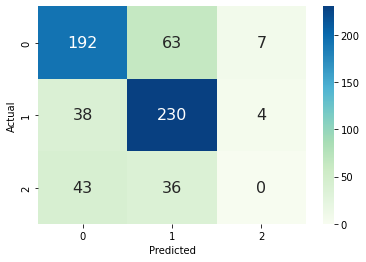

In [55]:
# Plot the result
label_names = np.arange(p.shape[0])
conf_mat_df = pd.DataFrame(conf_mat, index = label_names, columns = label_names)
conf_mat_df.index.name = 'Actual'
conf_mat_df.columns.name = 'Predicted'
sns.heatmap(conf_mat_df, annot=True, cmap='GnBu', 
            annot_kws={"size": 16}, fmt='g', cbar=True)
plt.show()

Let's use the micro average

In [44]:
# Precision, recall, f1, support: for each class
p, r, f1, support = precision_recall_fscore_support(y_test, y_test_pred, average='micro')

print(f"p = {p:.2f}")
print(f"r = {r:.2f}")
print(f"f1 = {f1:.2f}")
print(f"support = {support}")

p = 0.69
r = 0.69
f1 = 0.69
support = None


# 2. Cross-Validation
##  2.1 With kfold.split()

In [80]:
from sklearn.model_selection import KFold
# K-Fold with 5 splits
kfold = KFold(n_splits=5, shuffle=True)

print("Scores for each kfold iteration.")
i = 0
for train_indices, test_indices in kfold.split(X, y_truth):
    # Prepare splits
    X_train = X.loc[train_indices]
    y_train = y_truth.loc[train_indices]
    X_test = X.loc[test_indices]
    y_test = y_truth.loc[test_indices]
    
    # Train and evaluate
    clf = GaussianNB()
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    
    # Compute macro average f1
    _, _, f1, _ = precision_recall_fscore_support(y_test, y_test_pred)
    macro_f1 = f1.mean()
    
    print(f"Iteration {i}. \n\tmacro-f1 = {macro_f1:.3f}")
    i+=1

Scores for each kfold iteration.
Iteration 0. 
	macro-f1 = 0.501
Iteration 1. 
	macro-f1 = 0.531
Iteration 2. 
	macro-f1 = 0.480
Iteration 3. 
	macro-f1 = 0.513
Iteration 4. 
	macro-f1 = 0.528


## 2.2 With cross_val_score()
- Use scoring = 'f1_macro'

In [65]:
from sklearn.model_selection import cross_val_score

In [75]:
clf = GaussianNB()
f1_cv = cross_val_score(estimator=clf, X=X, y=y_truth, cv=5, scoring="f1_macro")
f1_cv

array([0.50716433, 0.49471464, 0.50663244, 0.52182634, 0.51496524])

In [76]:
print(f"Macro-f1 for each iteration: {f1_cv}")
mean_macro_f1 = f1_cv.mean()
std_macro_f1 = f1_cv.std() * 2
print(f"Macro-f1 (statistics): {mean_macro_f1:.2f} (+/- {std_macro_f1:.2f})")

Macro-f1 for each iteration: [0.50716433 0.49471464 0.50663244 0.52182634 0.51496524]
Macro-f1 (statistics): 0.51 (+/- 0.02)


## 2.3 Leave-One-Out and scoring: cross_val_predict()

- The previous approach (average of F1 for each iteration) cannot be used with leave one out. 
    - Iteration 0: y_test = [1] -> F1?
    - Iteration 1: y_test = [0] -> F1?
    - ...
    - Iteration 2: y_test = [1] -> F1?
- When test set has only 1 sample, F1, precision and recall cannot be properly computed.
- The following solution trains N models with leave one out, fits them on test data to obtain the vector y_pred (each model predicts 1 single value inside y_pred). Finally, it computes a single score by comparing y_pred with y_truth

In [77]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import LeaveOneOut

clf = GaussianNB()
y_pred = cross_val_predict(clf, X, y_truth, cv=LeaveOneOut())
_, _, f1_loo, _ = precision_recall_fscore_support(y_truth, y_pred)
macro_f1_loo = f1_loo.mean()
print(f"F1, for each class: {f1_loo}")
print(f"Macro-f1 = {macro_f1_loo:.2f}")

F1, for each class: [0.71562952 0.76223533 0.04968944]
Macro-f1 = 0.51
